### Import Libraries

In [2]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten


### Download the MNIST Dataset

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 19s 2us/step


In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

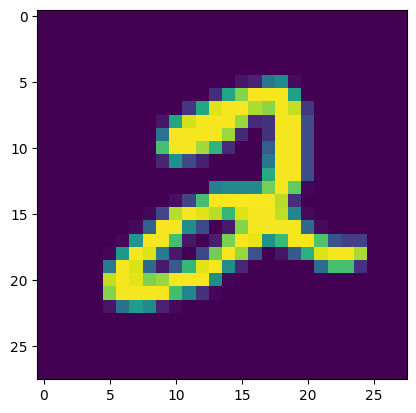

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

### Scaling between 0 and 1

In [12]:
X_train=X_train/255
X_test=X_test/255

In [31]:
model=Sequential()
# flatten the 2D array to 1D array
model.add(Flatten(input_shape=(28,28)))
# hidden layer with 128 nodes
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))

# softmax: for multiclassification
model.add(Dense(10,activation='softmax'))

C:\Users\ARWINDD\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [34]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8660 - loss: 0.4619 - val_accuracy: 0.9504 - val_loss: 0.1589
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9636 - loss: 0.1249 - val_accuracy: 0.9688 - val_loss: 0.1081
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9736 - loss: 0.0827 - val_accuracy: 0.9708 - val_loss: 0.0991
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9807 - loss: 0.0636 - val_accuracy: 0.9706 - val_loss: 0.0964
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0463 - val_accuracy: 0.9737 - val_loss: 0.0910
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9878 - loss: 0.0375 - val_accuracy: 0.9712 - val_loss: 0.1030
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9909 - loss: 0.0292 - val_accuracy: 0.9744 - val_loss: 0.0961
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9921 - loss: 0.0247 - 

In [35]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [36]:
y_prob

array([[1.5954957e-18, 1.3392440e-18, 1.3760563e-15, ..., 1.0000000e+00,
        1.9922028e-12, 2.0075025e-12],
       [6.5620915e-23, 8.5609860e-18, 1.0000000e+00, ..., 1.5323870e-30,
        1.5071005e-21, 0.0000000e+00],
       [2.1233481e-15, 9.9999189e-01, 2.4354458e-09, ..., 1.0296226e-06,
        7.0563187e-06, 6.8716721e-12],
       ...,
       [5.4800089e-31, 1.3269177e-25, 1.3672063e-33, ..., 7.5851211e-14,
        7.0095611e-19, 7.4652000e-11],
       [8.9789143e-22, 3.6193068e-23, 1.9880773e-25, ..., 2.9148288e-13,
        2.8211716e-06, 2.3840235e-17],
       [1.8812400e-23, 3.3798465e-16, 3.2032962e-16, ..., 3.3301287e-22,
        8.9893171e-16, 9.3101718e-27]], dtype=float32)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
y_pred=y_prob.argmax(axis=1)

In [39]:
accuracy_score(y_test,y_pred)

0.9762

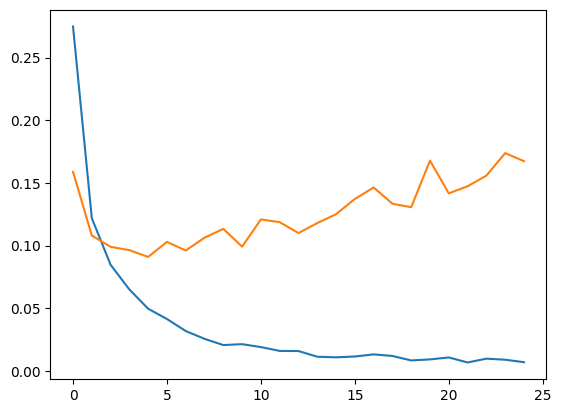

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

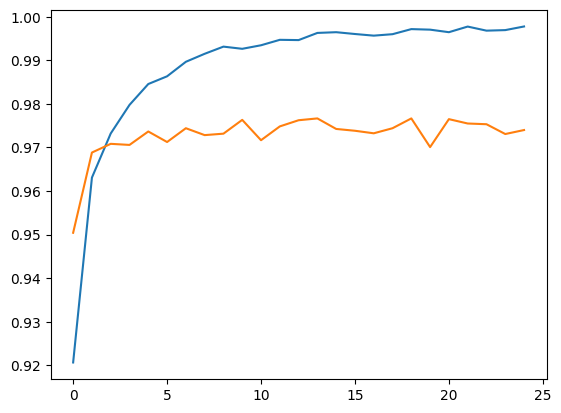

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

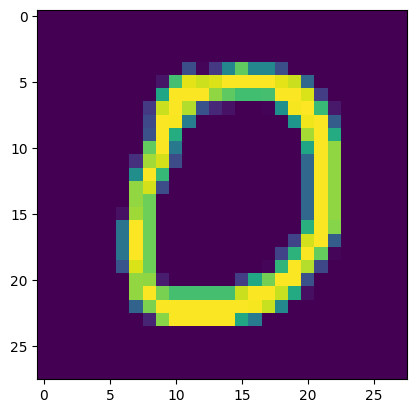

In [46]:
plt.imshow(X_test[10])

In [47]:
model.predict(X_test[10].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([0], dtype=int64)